# Simple bucket with a hole model
This model is basically just for demonstration. This is an example run of the Python implimentation of the model.
## bmi_bucket
This is the code for the Basic Model Interface (BMI) that is used to call the bucket model and interact with other models via the Framework, or driving code. This code contains all the required BMI functions to run the CFE, including 
 - initialize: Perform startup tasks for the model.
 - update: Advance model state by one time step. Calls the function `run_cfe` from `cfe.py`
 - update_until: Advance model state until the given time.
 - finalize: Perform tear-down tasks for the model.
 - get_value: Get a copy of values of a given variable.
 - set_value: Set the values of a given variable.
 - etc.  
 These functions need to be called by a framework or driving code, an example of which is below.

In [1]:
import time
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import bmi_bucket

### Create an instance of the model with a specific configuration that corresponds to a particular catchmenmt.

In [2]:
bucket_instance = bmi_bucket.BMI_BUCKET()

### This initialization function should perform all tasks that are to take place before entering the model’s time loop. Models should be refactored, if necessary, to read their inputs (which could include filenames for other input files) from a configuration file. BMI does not impose any constraint on how configuration files are formatted.

In [3]:
bucket_instance.initialize(cfg_file='./cat_58_config_bucket.json', current_time_step=0)

### Open the forcing file contained within the configuration file. We can run the model with any forcing. This is only an example. The path to the forcing file is contained within the configuration file, but it doesn't really need to be. This is just for organization.

In [4]:
with open(bucket_instance.forcing_file, 'r') as f:
    df_forcing = pd.read_csv(f)

### We will want to visualize the model output

In [5]:
outputs=bucket_instance.get_output_var_names()
output_lists = {output:[] for output in outputs}

In [6]:
np.sin(1)

0.8414709848078965

### Now we loop through the forcing data and use it to run the model at each time step

In [7]:
for i in range(df_forcing.shape[0]):
    
    framework_time = (1+i)*3600 # Seconds since starting simulation
    
    bucket_instance.set_value('atmosphere_water__time_integral_of_precipitation_volume_flux', df_forcing.loc[i,'APCP_surface'])
    bucket_instance.set_value('water_potential_evaporation_flux', 1e-9)
    
#    bucket_instance.update()

#    print([i, bucket_instance.get_current_time(), framework_time])

    bucket_instance.update_until(framework_time)
    
#    print([i, bucket_instance.get_current_time(), framework_time])
    
    for output in outputs:
    
        output_lists[output].append(bucket_instance.get_value(output))
        
#     if i>2:
#         break

118800 0.36000000536441795
140400 0.9
144000 1.440000021457672
147600 0.36000000536441795
1177200 2.7
1195200 0.18000000268220898
1198800 7.740000343322754
1396800 0.9
1400400 1.8
1404000 5.4
1407600 1.8
1411200 3.9600000858306883
1425600 5.4
1429200 7.920000171661377
1432800 7.920000171661377
1436400 2.880000042915344
1440000 4.139999914169311
1443600 6.8399999141693115
1836000 2.3400001287460324
1839600 11.160000514984132
1843200 11.7
1846800 13.140000343322754
1850400 67.86000137329101
1854000 17.459999656677248
1857600 4.5
1861200 2.3400001287460324
1864800 1.440000021457672
1947600 7.020000171661378
1951200 2.1600000858306885
1954800 20.88000068664551
1958400 3.2400001287460327
1962000 1.6200000643730164
1969200 18.0
1972800 3.2400001287460327
1976400 1.0800000429153442
1980000 3.9600000858306883
1983600 1.259999978542328
1987200 6.8399999141693115
1990800 2.519999957084656
1994400 3.9600000858306883
1998000 2.880000042915344
2001600 2.880000042915344
2070000 1.0800000429153442
20

### The finalize function should perform all tasks that take place after exiting the model’s time loop. This typically includes deallocating memory, closing files and printing reports.

In [8]:
bucket_instance.finalize(print_mass_balance=True)


MASS BALANCE
  initial:   5.0000
  input: 466.5600
  final:  10.2279
  lost:   0.0011
  overflow: 418.8261
  outlet:  42.5049
  residual: 7.8160e-14


### Here we are just plotting the fluxes.

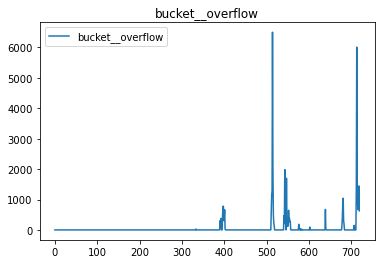

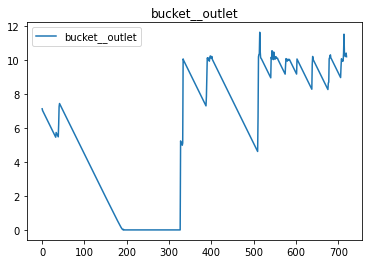

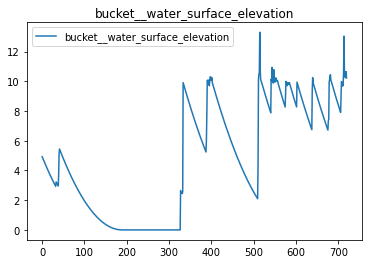

In [9]:
istart_plot=0
iend_plot=len(output_lists[outputs[0]])
x = list(range(istart_plot, iend_plot))
for output in outputs:
    plt.plot(x, output_lists[output][istart_plot:iend_plot], label=output)
    plt.title(output)
    plt.legend()
    plt.show()
    plt.close()